___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import time
%matplotlib inline
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import seaborn as sns
# Pandas libraries for SQL package
from pandasql import sqldf
import pandasql as psql

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
yahoo_financials = YahooFinancials('BAC')
data1 = yahoo_financials.get_historical_price_data(start_date='2006-01-01', 
                                                  end_date='2016-01-01', 
                                                  time_interval='daily')
bac = pd.DataFrame(data1['BAC']['prices'])
bac = bac.drop('date', axis=1).set_index('formatted_date')
bac.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700,33.584057
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900,33.227398
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700,33.270191
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800,33.220268
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400,33.241661


In [5]:
yahoo_financials = YahooFinancials('C')
data2 = yahoo_financials.get_historical_price_data(start_date='2006-01-01', 
                                                  end_date='2016-01-01', 
                                                  time_interval='daily')
c = pd.DataFrame(data2['C']['prices'])
c = c.drop('date', axis=1).set_index('formatted_date')
c.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600,361.662140
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960,354.985016
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160,356.746063
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210,356.746063
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740,355.058380


In [6]:
yahoo_financials = YahooFinancials('GS')
data3 = yahoo_financials.get_historical_price_data(start_date='2006-01-01', 
                                                  end_date='2016-01-01', 
                                                  time_interval='daily')
gs = pd.DataFrame(data3['GS']['prices'])
gs = gs.drop('date', axis=1).set_index('formatted_date')
gs.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700,102.626793
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600,101.209312
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400,101.169487
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600,102.602913
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500,103.837280


In [7]:
yahoo_financials = YahooFinancials('JPM')
data4 = yahoo_financials.get_historical_price_data(start_date='2006-01-01', 
                                                  end_date='2016-01-01', 
                                                  time_interval='daily')
jpm = pd.DataFrame(data4['JPM']['prices'])
jpm = jpm.drop('date', axis=1).set_index('formatted_date')
jpm.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600,25.922331
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500,25.772718
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400,25.850769
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900,26.032909
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200,26.455736


In [8]:
yahoo_financials = YahooFinancials('MS')
data5 = yahoo_financials.get_historical_price_data(start_date='2006-01-01', 
                                                  end_date='2016-01-01', 
                                                  time_interval='daily')
ms = pd.DataFrame(data5['MS']['prices'])
ms = ms.drop('date', axis=1).set_index('formatted_date')
ms.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000,35.558964
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800,35.583347
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000,35.680931
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800,35.717506
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500,36.095604


In [9]:
yahoo_financials = YahooFinancials('WFC')
data6 = yahoo_financials.get_historical_price_data(start_date='2006-01-01', 
                                                  end_date='2016-01-01', 
                                                  time_interval='daily')
wfc = pd.DataFrame(data6['WFC']['prices'])
wfc = wfc.drop('date', axis=1).set_index('formatted_date')
wfc.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400,20.242826
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000,20.008022
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000,19.985826
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800,20.103216
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600,20.100048


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [10]:
tickers = ['bac', 'c', 'gs', 'jpm', 'ms', 'wfc']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [11]:
bank_stocks = pd.concat([bac, c, gs, jpm, ms, wfc],
                      axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [12]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker           bac                                             \
Stock Info           high        low       open      close    volume   
formatted_date                                                         
2006-01-03      47.180000  46.150002  46.919998  47.080002  16296700   
2006-01-04      47.240002  46.450001  47.000000  46.580002  17757900   
2006-01-05      46.830002  46.320000  46.580002  46.639999  14970700   
2006-01-06      46.910000  46.349998  46.799999  46.570000  12599800   
2006-01-09      46.970001  46.360001  46.720001  46.599998  15619400   

Bank Ticker                         c                                      \
Stock Info       adjclose        high         low        open       close   
formatted_date                                                              
2006-01-03      33.584057  493.799988  481.100006  490.000000  492.899994   
2006-01-04      33.227398  491.000000  483.500000  488.600006  483.799988   
2006-01-05      33.270191  487.799988  484.000000  484.399994  486.200012   
2006-01-06      33.220268  489.000000  482.000000  488.799988  486.200012   
2006-01-09      33.241661  487.399994  483.000000  486.000000  483.899994   

Bank Ticker     ...         ms                                       wfc  \
Stock Info      ...       open      close   volume   adjclose       high   
formatted_date  ...                                                        
2006-01-03      ...  57.169998  58.310001  5377000  35.558964  31.975000   
2006-01-04      ...  58.700001  58.349998  7977800  35.583347  31.820000   
2006-01-05      ...  58.549999  58.509998  5778000  35.680931  31.555000   
2006-01-06      ...  58.770000  58.570000  6889800  35.717506  31.775000   
2006-01-09      ...  58.630001  59.189999  4144500  36.095604  31.825001   

Bank Ticker                                                           
Stock Info            low       open      close    volume   adjclose  
formatted_date                                                        
2006-01-03      31.195000  31.600000  31.900000  11016400  20.242826  
2006-01-04      31.365000  31.799999  31.530001  10870000  20.008022  
2006-01-05      31.309999  31.500000  31.495001  10158000  19.985826  
2006-01-06      31.385000  31.580000  31.680000   8403800  20.103216  
2006-01-09      31.555000  31.674999  31.674999   5619600  20.100048  

[5 rows x 36 columns]

** Check the head of the bank_stocks dataframe.**

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [48]:
bank_max = bank_stocks.xs(key='close',axis=1,
level='Stock Info').max()
bank_max

Bank Ticker
bac     54.900002
c      564.099976
gs     247.919998
jpm     70.080002
ms      89.300003
wfc     58.520000
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()


In [15]:
for tick in tickers:
    returns[tick+' Return'] =  bank_stocks[tick]['adjclose'].pct_change()

returns

,bac Return,c Return,gs Return,jpm Return,ms Return,wfc Return
formatted_date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003028,0.002742,-0.001109
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012031,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010517,0.010394,0.011812,0.011155


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

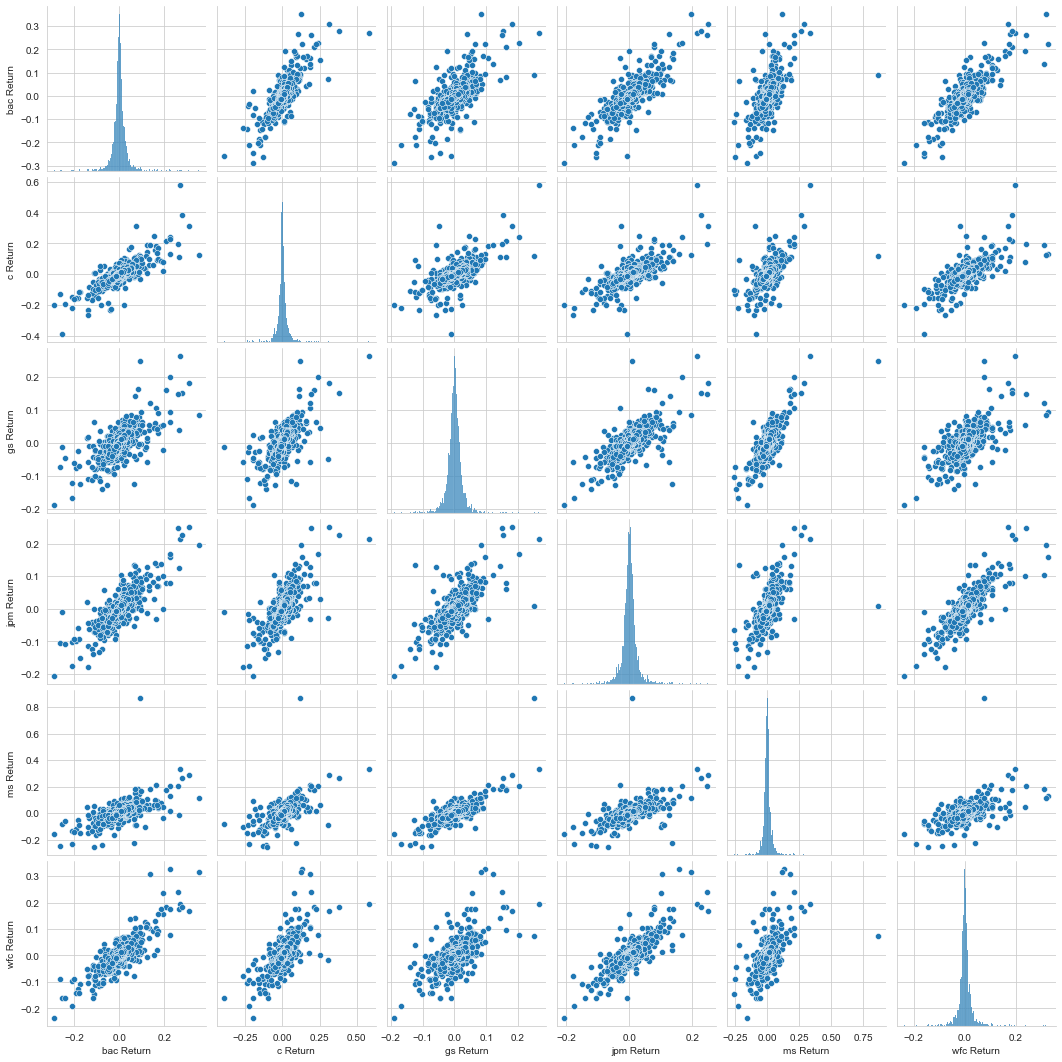

In [49]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [17]:
bank_worst = returns.idxmin()
bank_worst

bac Return    2009-01-20
c Return      2009-02-27
gs Return     2009-01-20
jpm Return    2009-01-20
ms Return     2008-10-09
wfc Return    2009-01-20
dtype: object

In [50]:
returns.min()

bac Return   -0.289693
c Return     -0.390244
gs Return    -0.189596
jpm Return   -0.207274
ms Return    -0.258929
wfc Return   -0.238223
dtype: float64

In [18]:
bank_best = returns.idxmax()
bank_best

bac Return    2009-04-09
c Return      2008-11-24
gs Return     2008-11-24
jpm Return    2009-01-21
ms Return     2008-10-13
wfc Return    2008-07-16
dtype: object

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [19]:
bank_stdev = returns.std()
bank_stdev

bac Return    0.036659
c Return      0.038672
gs Return     0.025386
jpm Return    0.027675
ms Return     0.037717
wfc Return    0.030195
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [20]:
bank_stdev = returns.loc['2015-01-01':'2015-12-31'].std()
bank_stdev

bac Return    0.016174
c Return      0.015288
gs Return     0.014043
jpm Return    0.014006
ms Return     0.016287
wfc Return    0.012552
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [21]:
ms_return=psql.sqldf(""" select formatted_date, "ms Return" from returns 
where formatted_date BETWEEN '2015-01-01' and '2015-12-31';""" )
ms_return1=ms_return.set_index('formatted_date')
ms_return1

,ms Return
formatted_date,
2015-01-02,-0.002320
2015-01-05,-0.031258
2015-01-06,-0.028800
2015-01-07,0.014278
2015-01-08,0.014889
...,...
2015-12-24,-0.003681
2015-12-28,-0.009544
2015-12-29,0.011812


In [54]:
returns['c Return'].loc['2015-01-01':'2015-12-31'].count()

252

In [118]:
psql.sqldf(""" select formatted_date, "ms Return" from returns 
where formatted_date = '2015-01-05' ;""") 

,formatted_date,ms Return
0,2015-01-05,-0.031258


<AxesSubplot:xlabel='ms Return', ylabel='Count'>

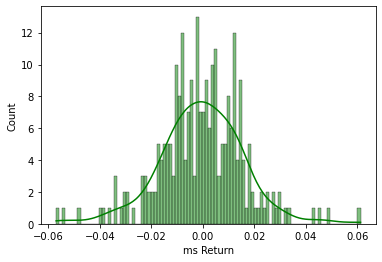

In [22]:
sns.histplot(data=ms_return1, x="ms Return", kde=True, bins=100,color='Green')


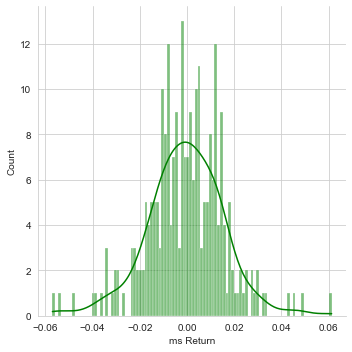

In [55]:
sns.displot(data=ms_return1, x="ms Return", kde=True, bins=100,color='Green')



/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



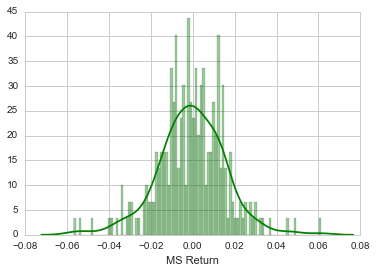

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

In [24]:
c_return=psql.sqldf(""" select formatted_date, "c Return" from returns 
where formatted_date BETWEEN '2008-01-01' and '2008-12-31';""" )
c_return1=c_return.set_index('formatted_date')
c_return1

,c Return
formatted_date,
2008-01-02,-0.017663
2008-01-03,0.000346
2008-01-04,-0.023851
2008-01-07,0.000709
2008-01-08,-0.039632
...,...
2008-12-24,0.039877
2008-12-26,-0.007375
2008-12-29,-0.023774


<AxesSubplot:xlabel='c Return', ylabel='Count'>

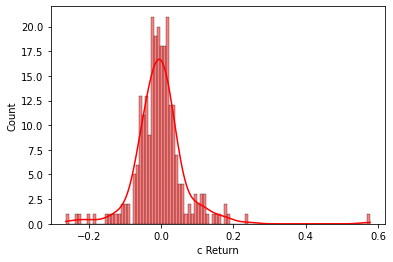

In [25]:
sns.histplot(data=c_return1, x="c Return", kde=True, bins=100,color='red')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



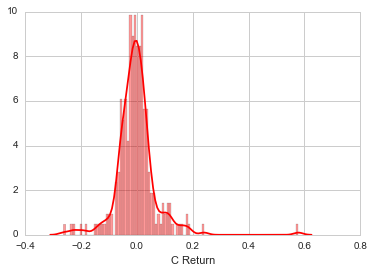

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



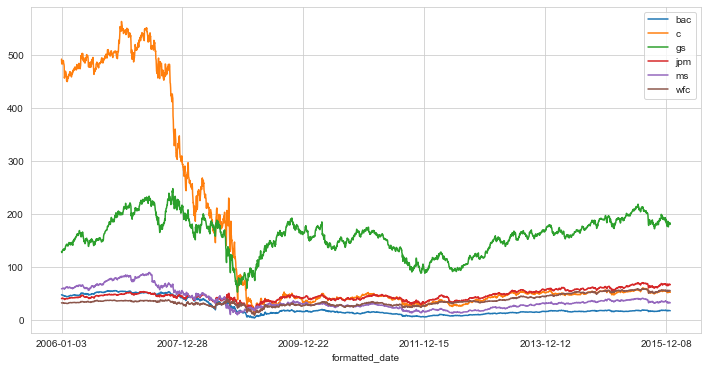

In [27]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,6),label=tick)
plt.legend()


/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



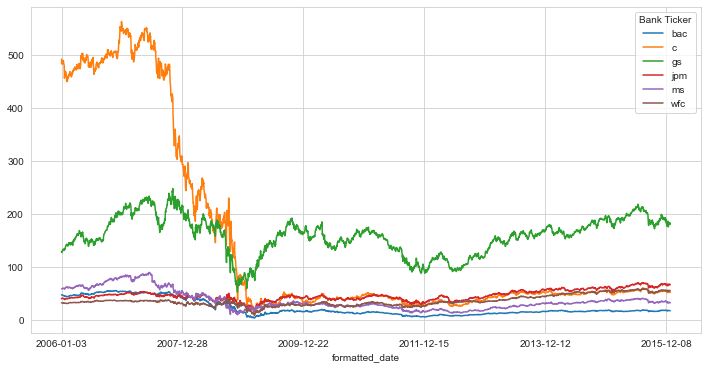

In [29]:
bank_stocks.xs(key='close',axis=1,
level='Stock Info').plot(figsize=(12,6))
plt.show()

In [56]:
bank_stocks.xs(key='close',axis=1,
level='Stock Info').iplot()

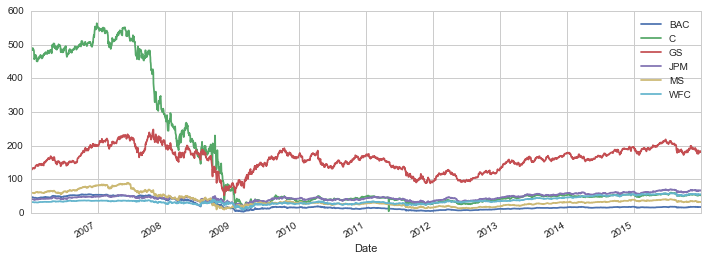

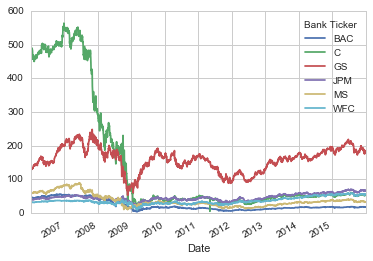

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



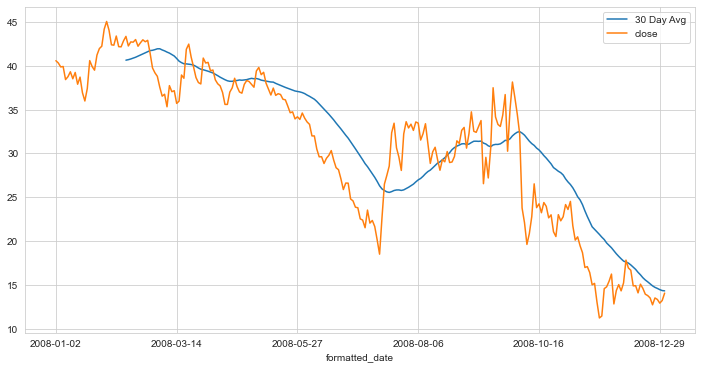

In [41]:
#rolling = moving average
plt.figure(figsize=(12,6))
bac['close'].loc['2008-01-01':'2009-01-01'].rolling(
    window=30).mean().plot(label='30 Day Avg');
bac['close'].loc['2008-01-01':'2009-01-01'].plot(label='close')
plt.legend()
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

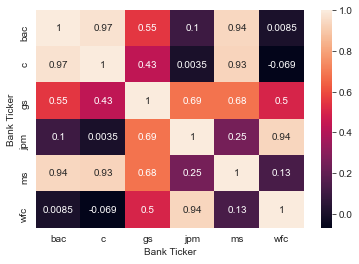

In [46]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,
         level='Stock Info').corr(),annot=True);

plt.show()

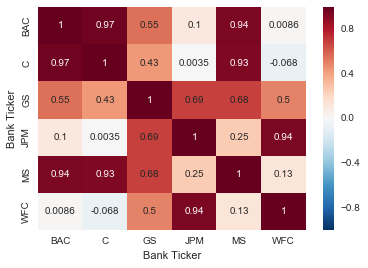

** Optional: Use seaborn's clustermap to cluster the correlations together:**

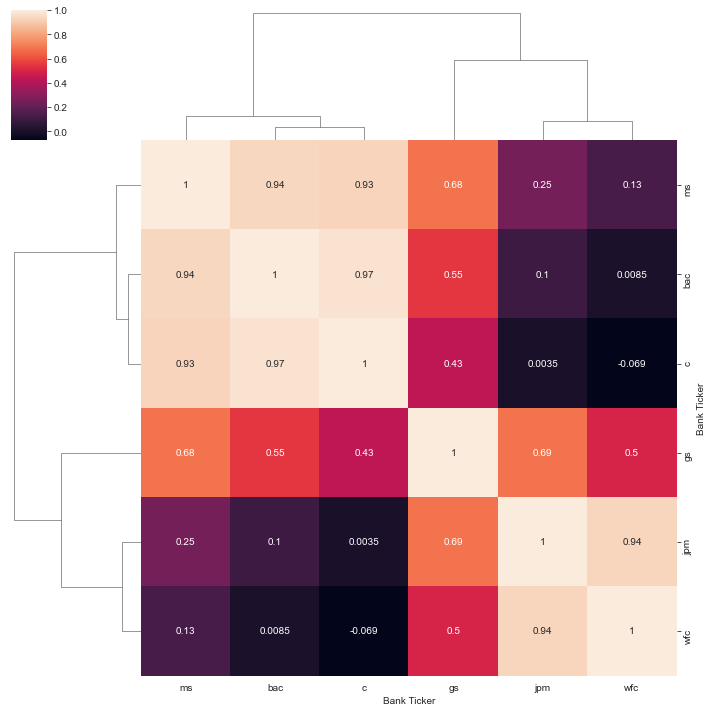

In [47]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,
         level='Stock Info').corr(),annot=True);

plt.show()

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [60]:
close_corr= bank_stocks.xs(key='close',axis=1,
         level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [64]:
bac15=bac[['open','high','low','close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [67]:
bac15=bac['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.